DBSCAN - Density Based Spatial Clustering of Application with noice

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    

In [95]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
X = df.iloc[:, [3, 4]].values  # Assuming the last two columns are the features for clustering

In [97]:
X = StandardScaler().fit_transform(X)

- eps - Neighbourhood radius : How close two points must be to be in the same cluster
- min_sample - Minimum points in a cluster : The minimum number of points needed to form a cluster

In [98]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

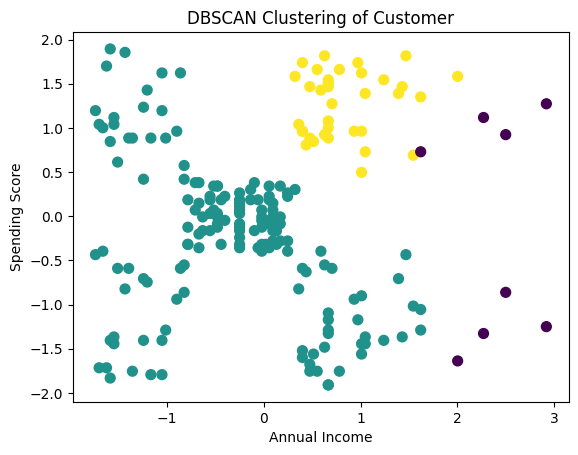

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [100]:
#finding outliers
outliers = X[labels == -1]
print("Total number of outliers:", len(outliers))

Total number of outliers: 8


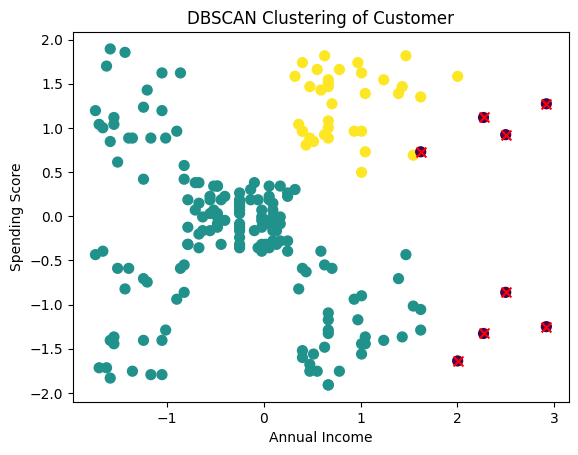

In [101]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=50, label='Outliers', marker='x')
plt.title('DBSCAN Clustering of Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [102]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.35044619989666004
